<a href="https://colab.research.google.com/github/ibad321/Banking-Data-Analysis/blob/main/Banking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import pickle
import joblib

In [ ]:
# import library for normalizing, modeling, evaluate
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_classif
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, f1_score, auc
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# EDA

In [ ]:
#Reading training and testing data as dataframes
train = pd.read_csv("/content/drive/MyDrive/dataset/train.csv",sep =";")
test = pd.read_csv("/content/drive/MyDrive/dataset/test.csv", sep =";")
# dataset size
print('Train data size: ', train.shape)
print('Test data size: ', test.shape)

Train data size:  (45211, 17)
Test data size:  (4521, 17)


In [ ]:
train.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [ ]:
train.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [ ]:
test.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

#### Observation:

There is no null values, however it seems to has been replaced to `unknown`

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [ ]:
train.describe(include='all')

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
count,45211.000000,45211,45211,45211,45211,45211.000000,45211,45211,45211,45211.000000,45211,45211.000000,45211.000000,45211.000000,45211.000000,45211,45211
unique,NaN,12,3,4,2,NaN,2,2,3,NaN,12,NaN,NaN,NaN,NaN,4,2
top,NaN,blue-collar,married,secondary,no,NaN,yes,no,cellular,NaN,may,NaN,NaN,NaN,NaN,unknown,no
freq,NaN,9732,27214,23202,44396,NaN,25130,37967,29285,NaN,13766,NaN,NaN,NaN,NaN,36959,39922
mean,40.936210,NaN,NaN,NaN,NaN,1362.272058,NaN,NaN,NaN,15.806419,NaN,258.163080,2.763841,40.197828,0.580323,NaN,NaN
std,10.618762,NaN,NaN,NaN,NaN,3044.765829,NaN,NaN,NaN,8.322476,NaN,257.527812,3.098021,100.128746,2.303441,NaN,NaN
min,18.000000,NaN,NaN,NaN,NaN,-8019.000000,NaN,NaN,NaN,1.000000,NaN,0.000000,1.000000,-1.000000,0.000000,NaN,NaN
25%,33.000000,NaN,NaN,NaN,NaN,72.000000,NaN,NaN,NaN,8.000000,NaN,103.000000,1.000000,-1.000000,0.000000,NaN,NaN
50%,39.000000,NaN,NaN,NaN,NaN,448.000000,NaN,NaN,NaN,16.000000,NaN,180.000000,2.000000,-1.000000,0.000000,NaN,NaN
75%,48.000000,NaN,NaN,NaN,NaN,1428.000000,NaN,NaN,NaN,21.000000,NaN,319.000000,3.000000,-1.000000,0.000000,NaN,NaN


In [ ]:
test.describe(include='all')

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
count,4521.000000,4521,4521,4521,4521,4521.000000,4521,4521,4521,4521.000000,4521,4521.000000,4521.000000,4521.000000,4521.000000,4521,4521
unique,NaN,12,3,4,2,NaN,2,2,3,NaN,12,NaN,NaN,NaN,NaN,4,2
top,NaN,management,married,secondary,no,NaN,yes,no,cellular,NaN,may,NaN,NaN,NaN,NaN,unknown,no
freq,NaN,969,2797,2306,4445,NaN,2559,3830,2896,NaN,1398,NaN,NaN,NaN,NaN,3705,4000
mean,41.170095,NaN,NaN,NaN,NaN,1422.657819,NaN,NaN,NaN,15.915284,NaN,263.961292,2.793630,39.766645,0.542579,NaN,NaN
std,10.576211,NaN,NaN,NaN,NaN,3009.638142,NaN,NaN,NaN,8.247667,NaN,259.856633,3.109807,100.121124,1.693562,NaN,NaN
min,19.000000,NaN,NaN,NaN,NaN,-3313.000000,NaN,NaN,NaN,1.000000,NaN,4.000000,1.000000,-1.000000,0.000000,NaN,NaN
25%,33.000000,NaN,NaN,NaN,NaN,69.000000,NaN,NaN,NaN,9.000000,NaN,104.000000,1.000000,-1.000000,0.000000,NaN,NaN
50%,39.000000,NaN,NaN,NaN,NaN,444.000000,NaN,NaN,NaN,16.000000,NaN,185.000000,2.000000,-1.000000,0.000000,NaN,NaN
75%,49.000000,NaN,NaN,NaN,NaN,1480.000000,NaN,NaN,NaN,21.000000,NaN,329.000000,3.000000,-1.000000,0.000000,NaN,NaN


In [ ]:
columns = train.columns.values
print(columns)

['age' 'job' 'marital' 'education' 'default' 'balance' 'housing' 'loan'
 'contact' 'day' 'month' 'duration' 'campaign' 'pdays' 'previous'
 'poutcome' 'y']


In [ ]:
# explore variable
for col in columns:
    print(f"{col} \n{20 * '-'}")
    print(train[col].value_counts(), '\n')

age 
--------------------
age
32    2085
31    1996
33    1972
34    1930
35    1894
      ... 
93       2
90       2
95       2
88       2
94       1
Name: count, Length: 77, dtype: int64 

job 
--------------------
job
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: count, dtype: int64 

marital 
--------------------
marital
married     27214
single      12790
divorced     5207
Name: count, dtype: int64 

education 
--------------------
education
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: count, dtype: int64 

default 
--------------------
default
no     44396
yes      815
Name: count, dtype: int64 

balance 
--------------------
balance
 0        3514
 1         195
 2         156
 4         139
 3         134
          ... 
-

### There are two data types:

**Numerical Data:** age, balance, day, duration, campaign, pdays, previous

**Categorical Data:**
- job: (blue-collar, management, technician, admin, services, retired, self-employed, entrepreneur, unemployed, housemaid, student, unknown)
- marital: (married, single, divorced)
- education: (secondary, tertiary, primary, unknown)
- default: (no, yes)
- housing: (no, yes)
- loan: (no, yes)
- contact: (cellular, unknown, telephone)
- month: (jan, feb, ... dec)
- poutcome: (unknown, failure, other, success)
- y: (no, yes)

#### Observation:

There four categorical columns that can be changed to numerical: default, housing, loan, y.

In [ ]:
def plot_categorical_variable(data, name, figsize=(8,4), rotation=45):
    plt.figure(figsize=figsize)
    sns.set_theme(style="whitegrid")
    sns.countplot(x=data[name], data=data, hue='y')
    # plt.title(name)
    plt.xticks(rotation=rotation)
    plt.show()

    plt.figure(figsize=figsize)
    sns.set_theme(style="whitegrid")
    sns.countplot(x=data[name], data=data)
    # plt.title(name)
    plt.xticks(rotation=rotation)
    plt.show()

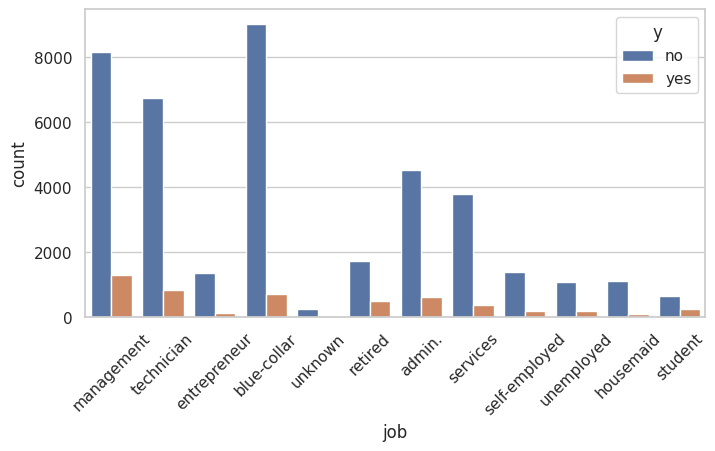

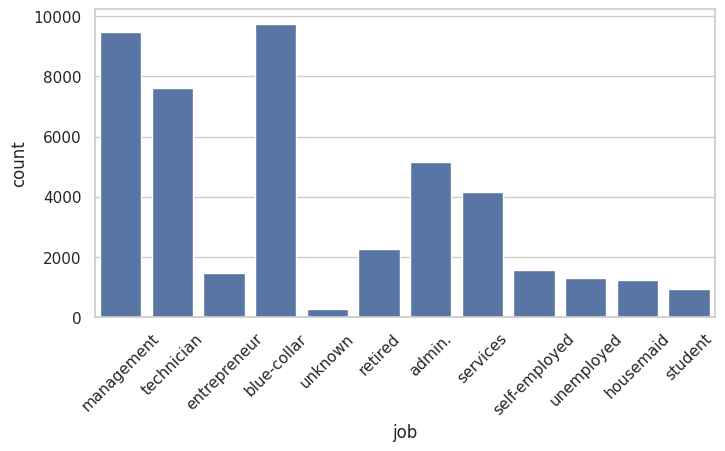

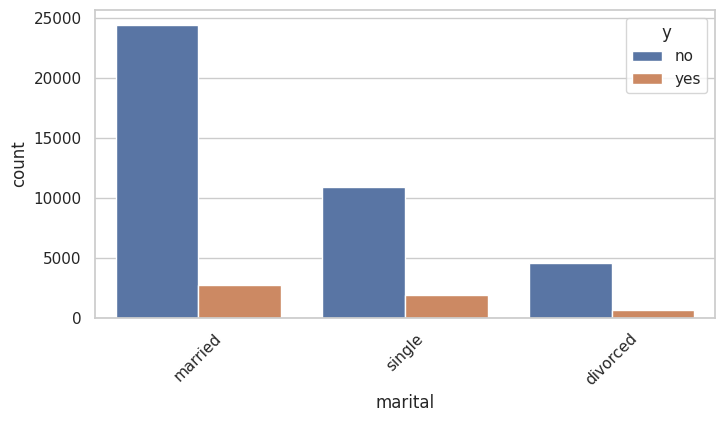

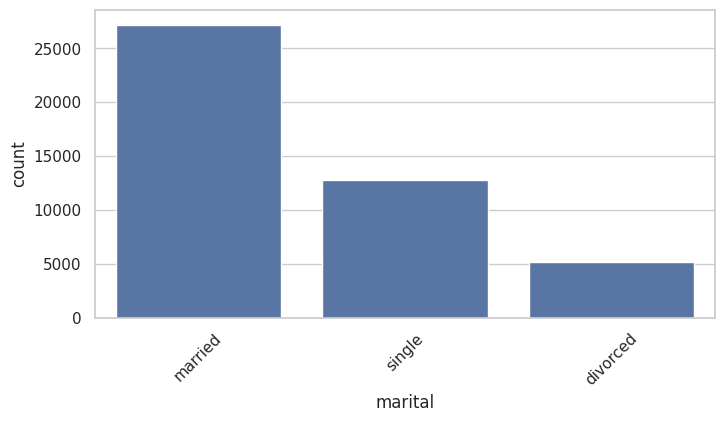

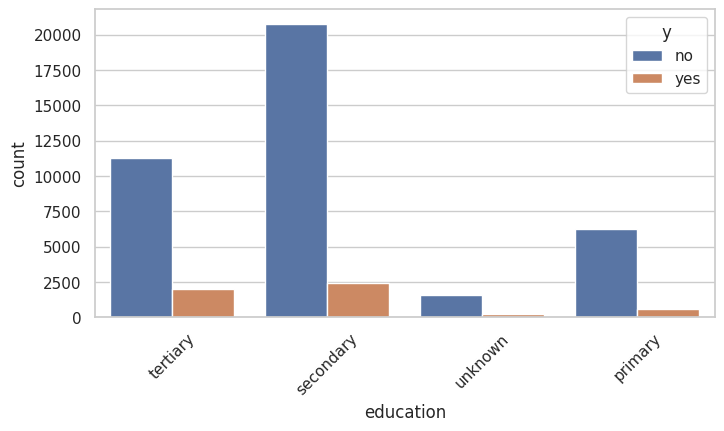

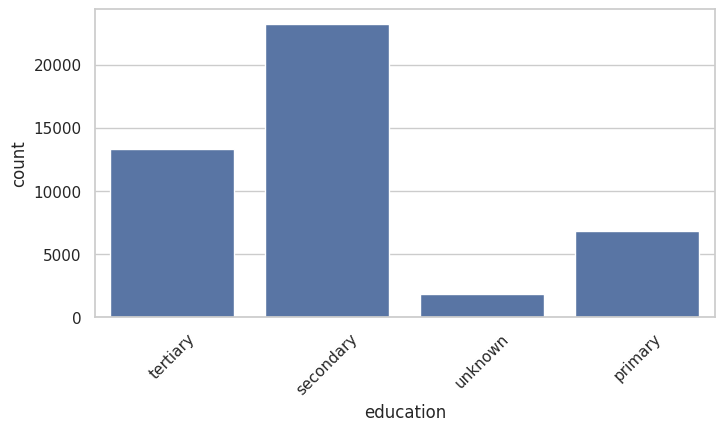

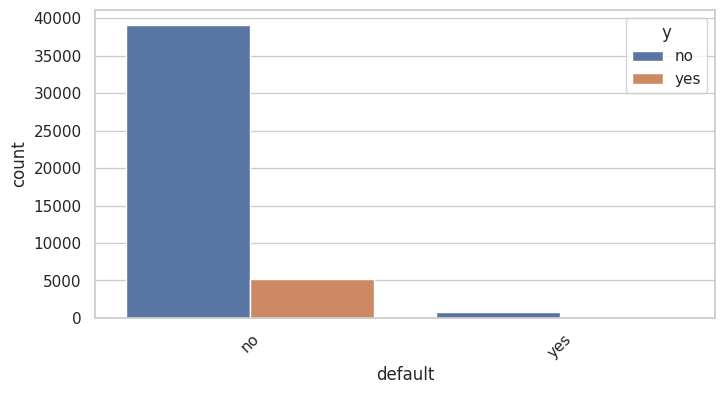

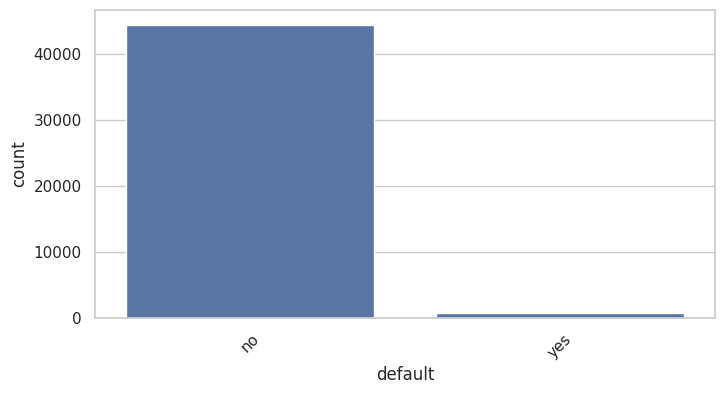

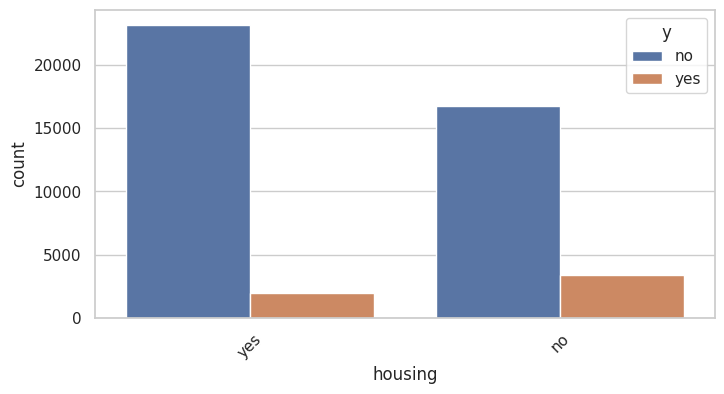

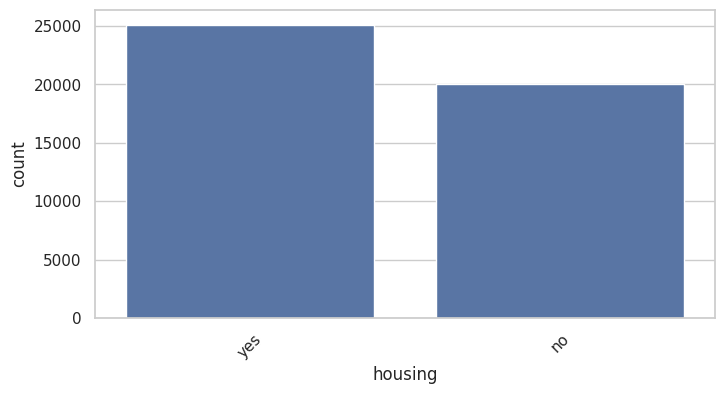

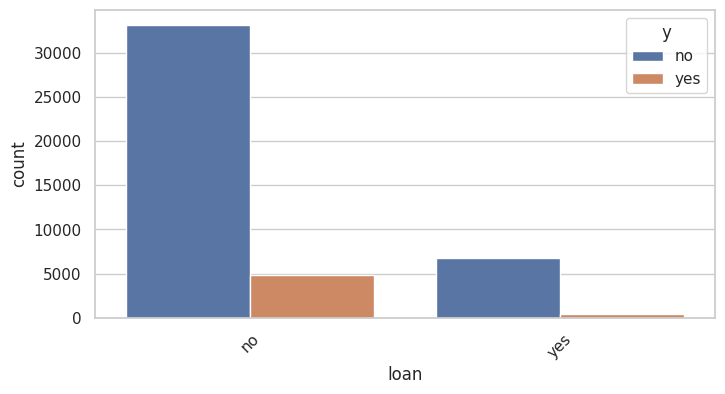

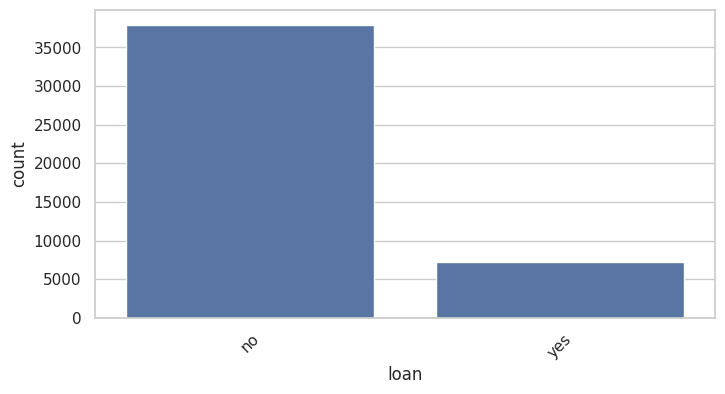

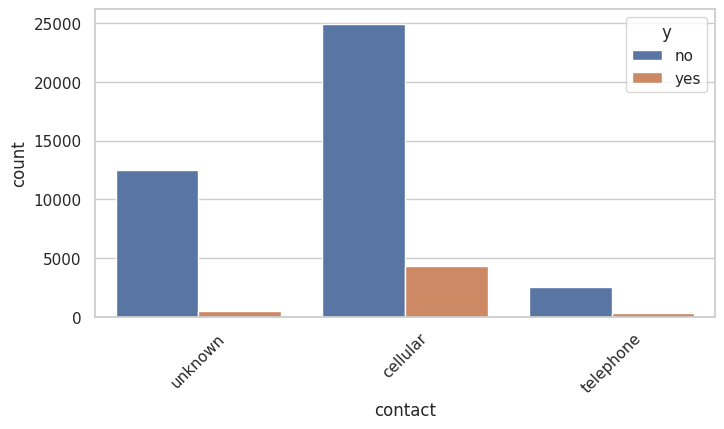

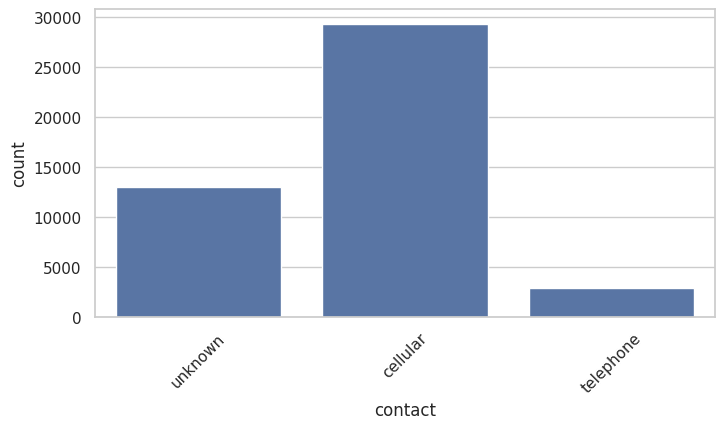

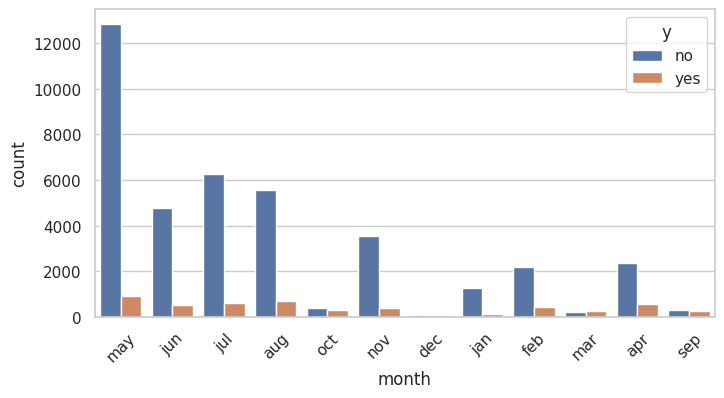

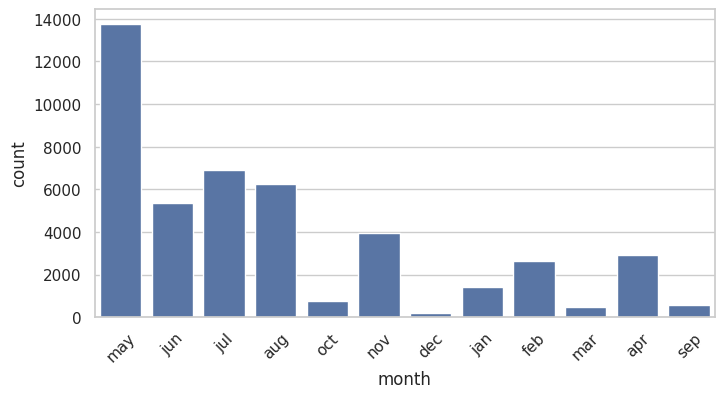

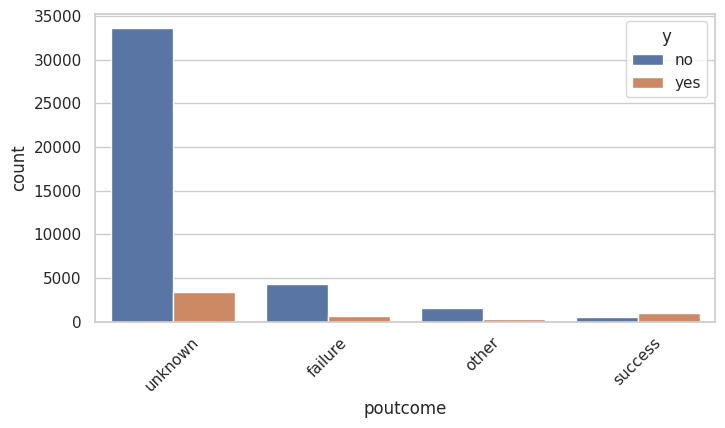

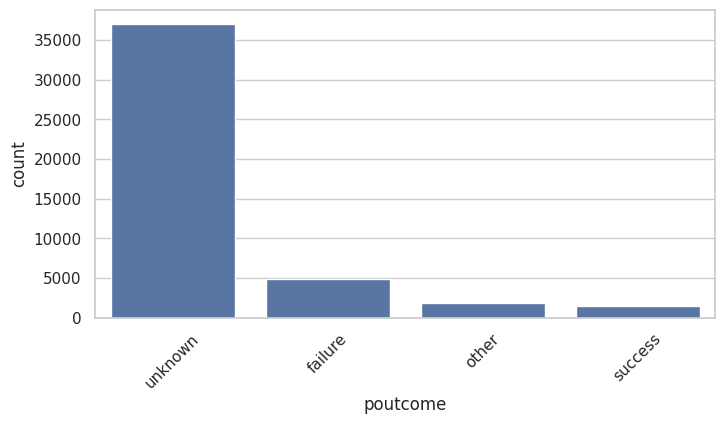

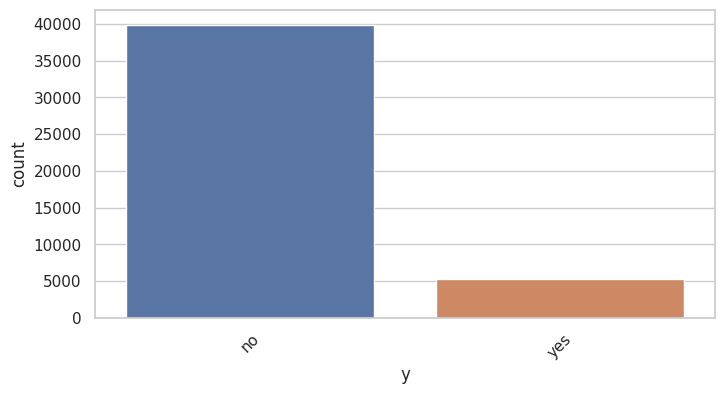

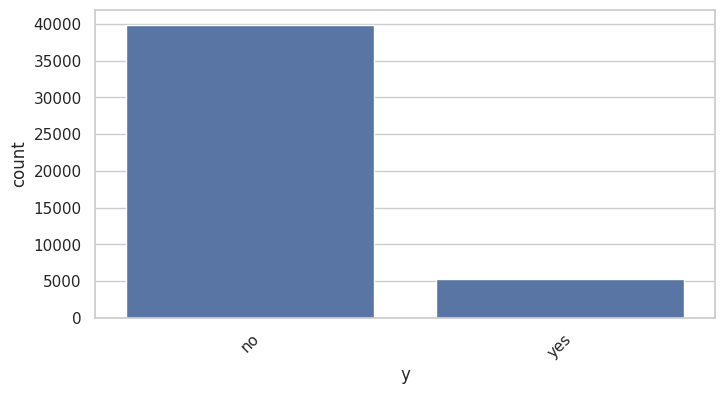

In [ ]:
# data visualization for categorical columns

categorical = train.select_dtypes(include=['object']).columns.values

for col in categorical:
    plot_categorical_variable(train, col)

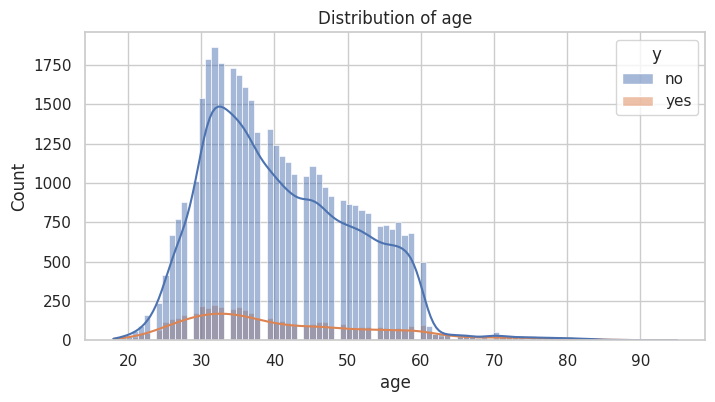

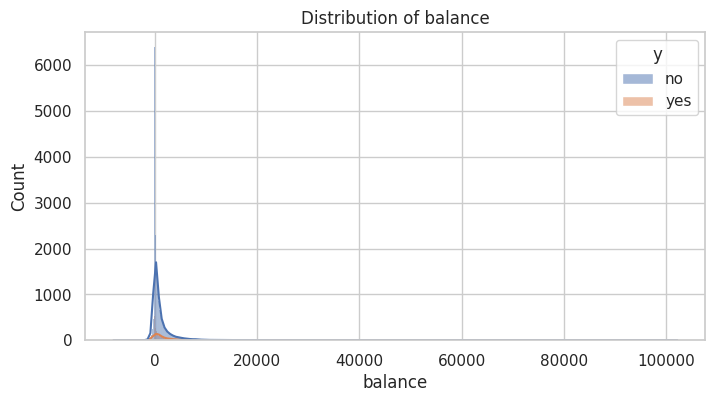

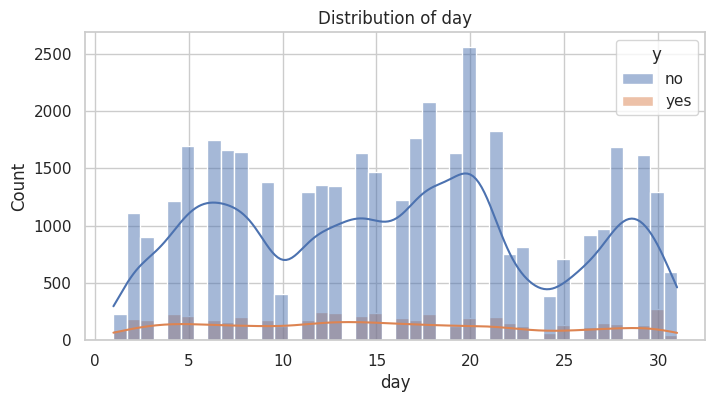

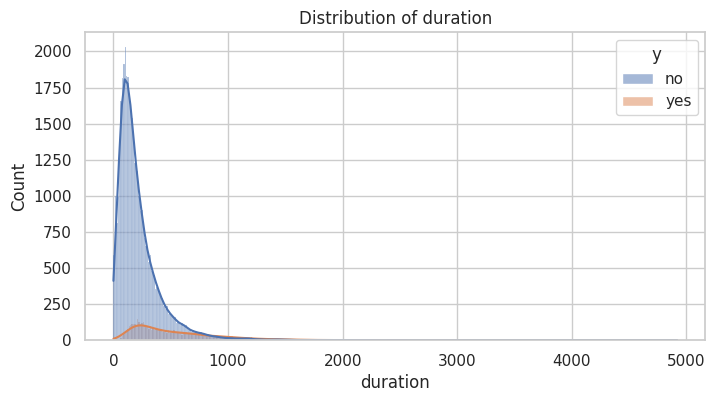

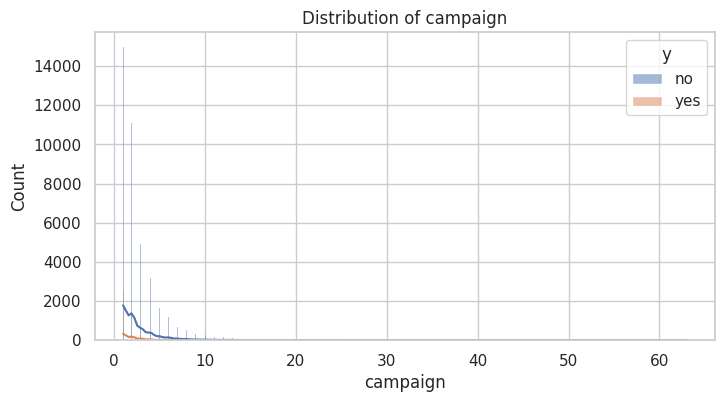

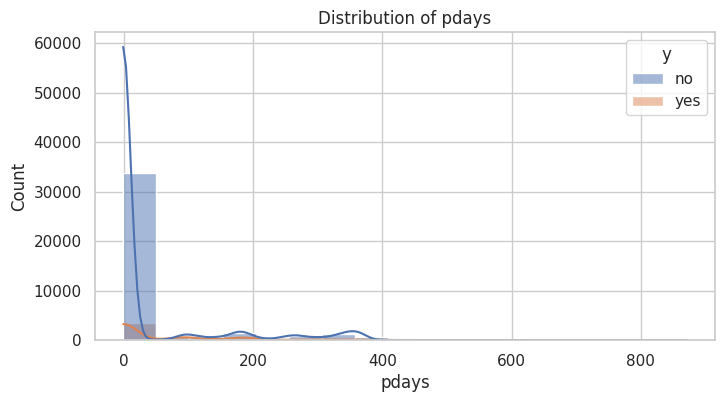

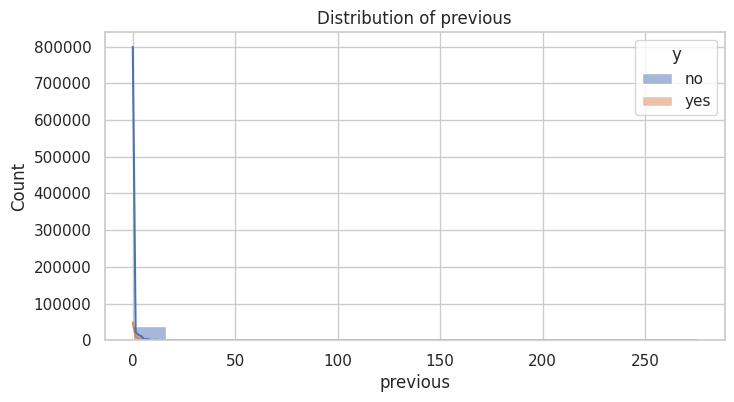

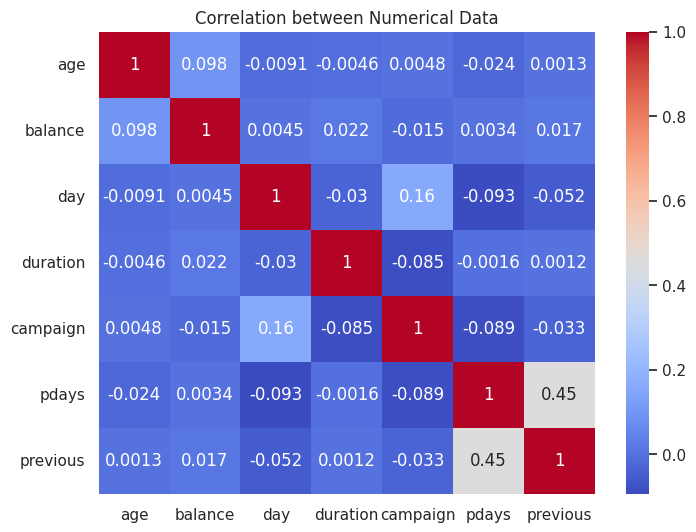

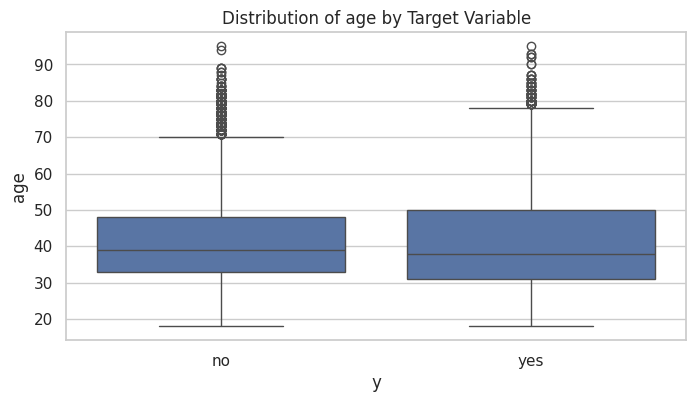

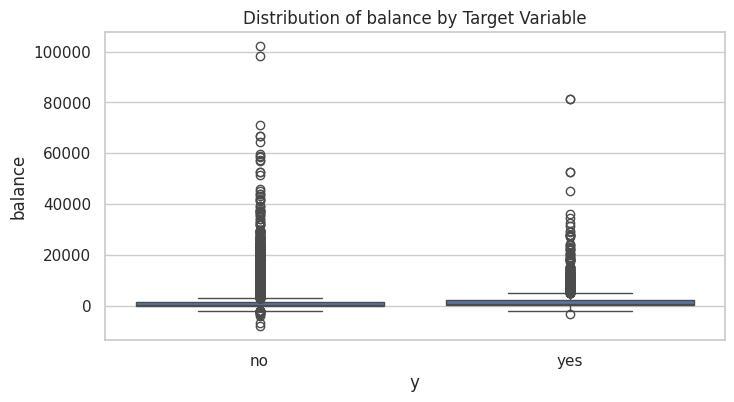

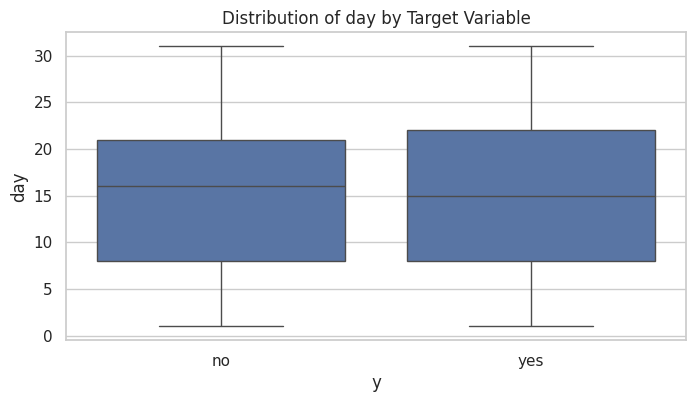

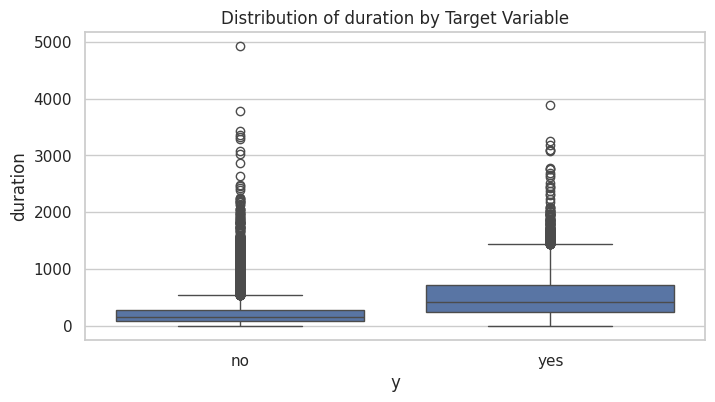

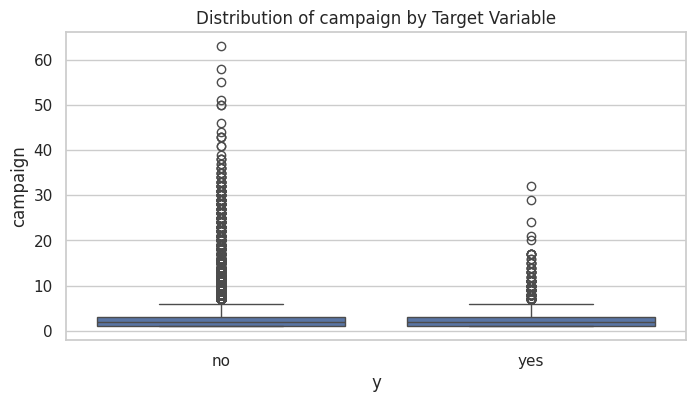

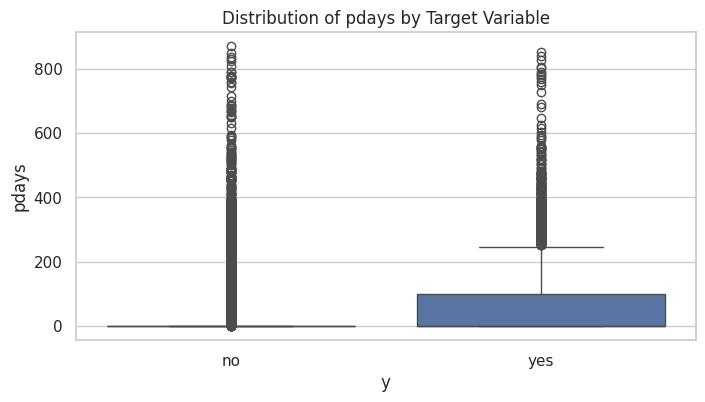

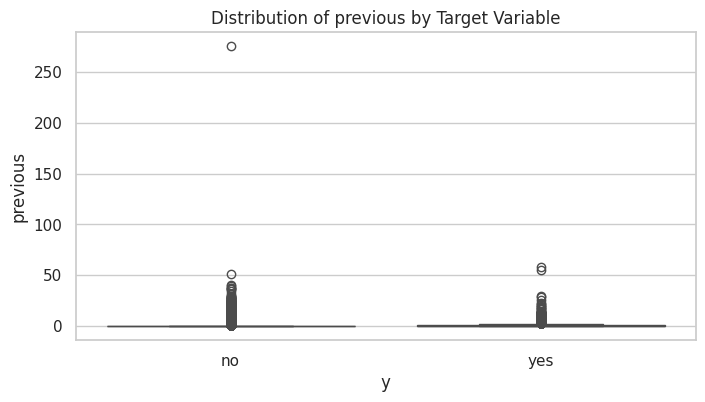

In [ ]:
# Numerical Data:
numerical = train.select_dtypes(include=['int64', 'float64']).columns.values

# Generate some useful plots:

# 1. Distribution of numerical data:
for col in numerical:
  plt.figure(figsize=(8, 4))
  sns.histplot(data=train, x=col, hue='y', kde=True)
  plt.title(f'Distribution of {col}')
  plt.show()

# 2. Correlation between numerical data:
corr = train[numerical].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation between Numerical Data')
plt.show()

# 3. Boxplots of numerical data by target variable:
for col in numerical:
  plt.figure(figsize=(8, 4))
  sns.boxplot(x='y', y=col, data=train)
  plt.title(f'Distribution of {col} by Target Variable')
  plt.show()



# Preprocessing

In [ ]:
train.drop(['day', 'month'], axis=1, inplace=True)
test.drop(['day', 'month'], axis=1, inplace=True)

**Changing Data Type**

We are going to change four categorical columns into numerical columns because they have binary values. (`default`, `housing`, `loan`, `y`)

In [ ]:
for col in ['default', 'housing', 'loan', 'y']:
    train[col].replace(['yes', 'no'], [1, 0], inplace=True)
    test[col].replace(['yes', 'no'], [1, 0], inplace=True)

In [ ]:
train

,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,0,2143,1,0,unknown,261,1,-1,0,unknown,0
1,44,technician,single,secondary,0,29,1,0,unknown,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,0,2,1,1,unknown,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,0,1506,1,0,unknown,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,0,1,0,0,unknown,198,1,-1,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,0,825,0,0,cellular,977,3,-1,0,unknown,1
45207,71,retired,divorced,primary,0,1729,0,0,cellular,456,2,-1,0,unknown,1
45208,72,retired,married,secondary,0,5715,0,0,cellular,1127,5,184,3,success,1
45209,57,blue-collar,married,secondary,0,668,0,0,telephone,508,4,-1,0,unknown,0


In [ ]:
test

,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,0,1787,0,0,cellular,79,1,-1,0,unknown,0
1,33,services,married,secondary,0,4789,1,1,cellular,220,1,339,4,failure,0
2,35,management,single,tertiary,0,1350,1,0,cellular,185,1,330,1,failure,0
3,30,management,married,tertiary,0,1476,1,1,unknown,199,4,-1,0,unknown,0
4,59,blue-collar,married,secondary,0,0,1,0,unknown,226,1,-1,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,0,-333,1,0,cellular,329,5,-1,0,unknown,0
4517,57,self-employed,married,tertiary,1,-3313,1,1,unknown,153,1,-1,0,unknown,0
4518,57,technician,married,secondary,0,295,0,0,cellular,151,11,-1,0,unknown,0
4519,28,blue-collar,married,secondary,0,1137,0,0,cellular,129,4,211,3,other,0


**Seperate Columns**

We are going to separate the categorical and numerical columns because they will be treated differently.

Feature Selection 1: Numerical Input to Categorical Output

Method : Correlation Test and ANOVA

In [ ]:
cat_cols = ['job', 'marital', 'education', 'poutcome']
num_cols = ['age', 'default', 'balance', 'housing', 'loan', 'duration', 'campaign', 'pdays', 'previous']
tar_cols = ['y']

In [ ]:
df_cat = train[cat_cols + tar_cols]
df_num = train[num_cols + tar_cols]

In [ ]:
print('Categorical Data: ', df_cat.shape)
print('Numerical Data: ', df_num.shape)

Categorical Data:  (45211, 5)
Numerical Data:  (45211, 10)


In [ ]:
df_num

,age,default,balance,housing,loan,duration,campaign,pdays,previous,y
0,58,0,2143,1,0,261,1,-1,0,0
1,44,0,29,1,0,151,1,-1,0,0
2,33,0,2,1,1,76,1,-1,0,0
3,47,0,1506,1,0,92,1,-1,0,0
4,33,0,1,0,0,198,1,-1,0,0
...,...,...,...,...,...,...,...,...,...,...
45206,51,0,825,0,0,977,3,-1,0,1
45207,71,0,1729,0,0,456,2,-1,0,1
45208,72,0,5715,0,0,1127,5,184,3,1
45209,57,0,668,0,0,508,4,-1,0,0


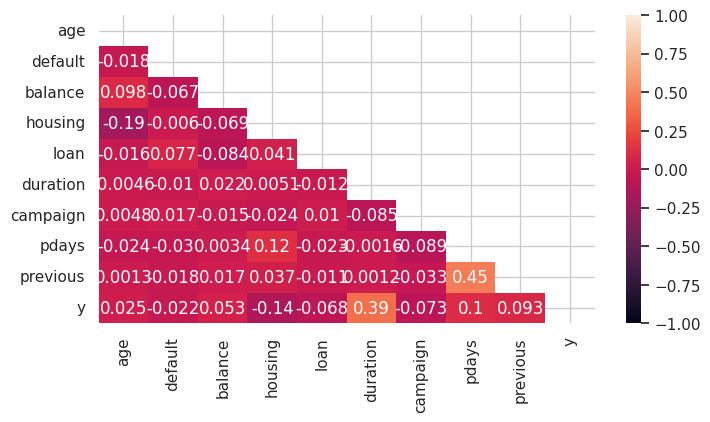

In [ ]:
# Correlation Test

plt.figure(figsize=(8,4))
mask = np.triu(np.ones_like(df_num.corr(), dtype=bool))
sns.heatmap(df_num.corr(), vmin=-1, vmax=1, mask=mask, annot=True)
plt.show()

In [ ]:
df_num[['age', 'balance', 'duration', 'campaign', 'previous']].skew()

age          0.684818
balance      8.360308
duration     3.144318
campaign     4.898650
previous    41.846454
dtype: float64

In [ ]:
df_num[['age', 'balance', 'duration', 'campaign', 'previous']].kurtosis()

age            0.319570
balance      140.751547
duration      18.153915
campaign      39.249651
previous    4506.860660
dtype: float64

In [ ]:
def plot_histogram(data, name, bins=30, kde=True, figsize=(8,4)):
    plt.figure(figsize=figsize)
    sns.set_theme(style="whitegrid")
    sns.histplot(x=data[name], data=data, hue='y', kde=kde)
    # plt.title(name)
    plt.show()

    plt.figure(figsize=figsize)
    sns.set_theme(style="whitegrid")
    sns.histplot(x=data[name], data=data, kde=kde)
    # plt.title(name)
    plt.show()


    plt.figure(figsize=figsize)
    sns.set_theme(style="whitegrid")
    sns.kdeplot(x=data[name], data=data, cumulative=True)
    # plt.title(name)
    plt.show()

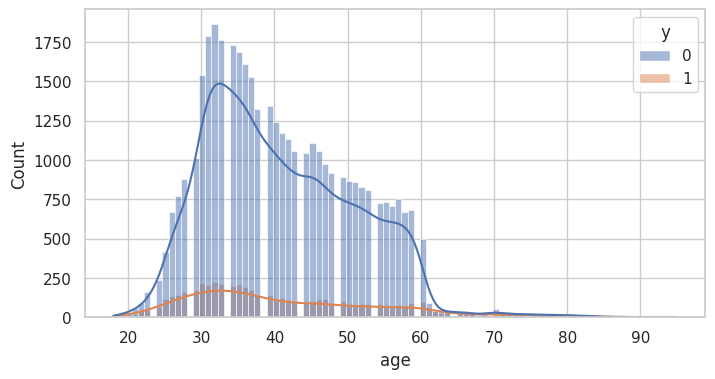

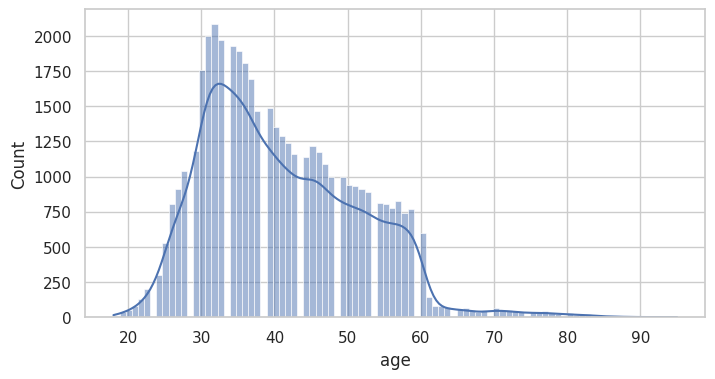

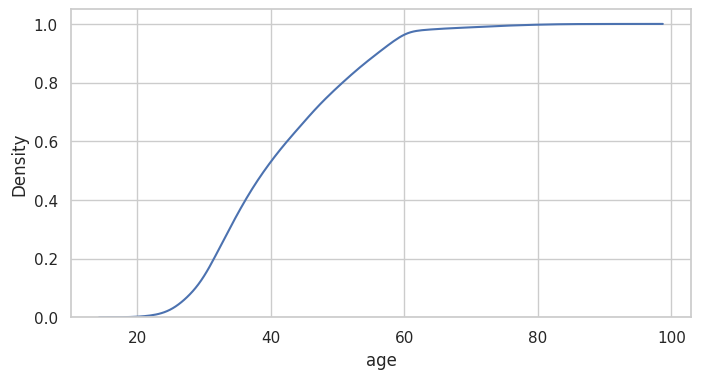

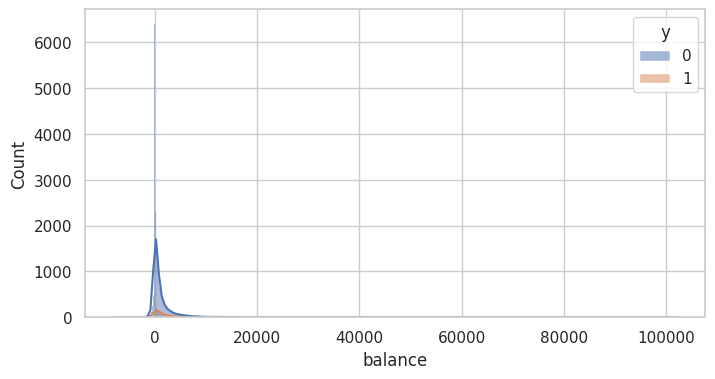

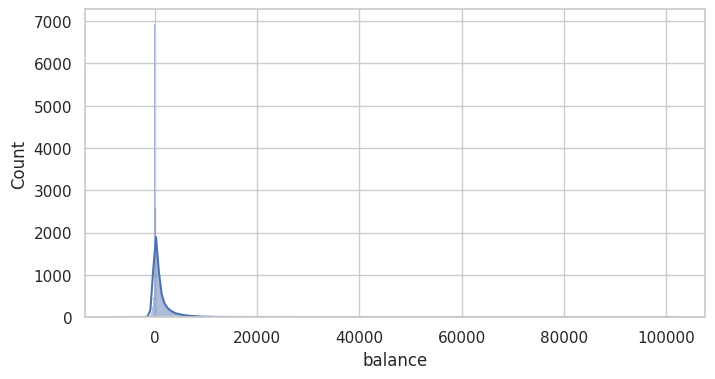

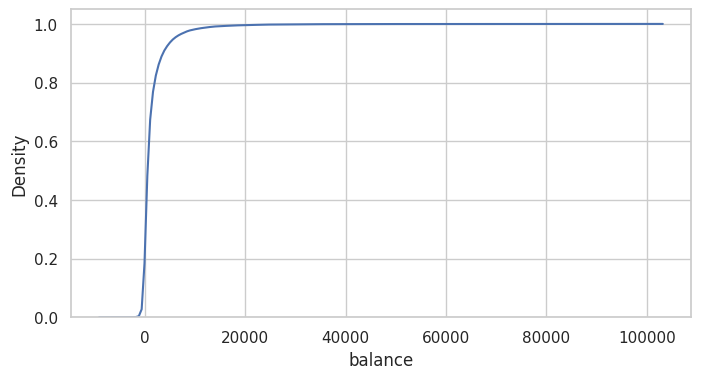

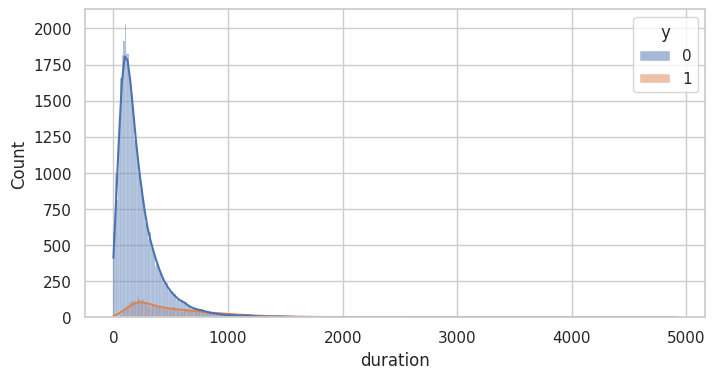

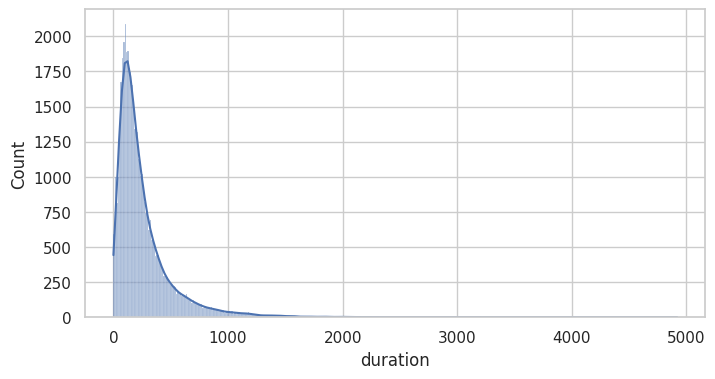

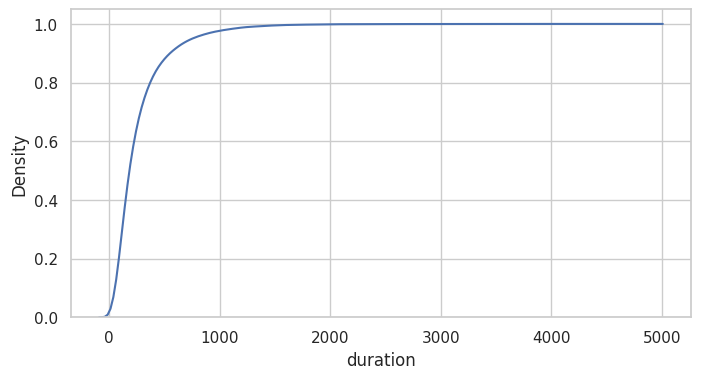

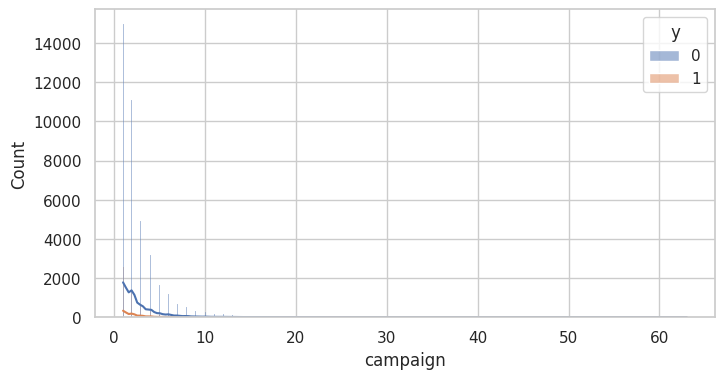

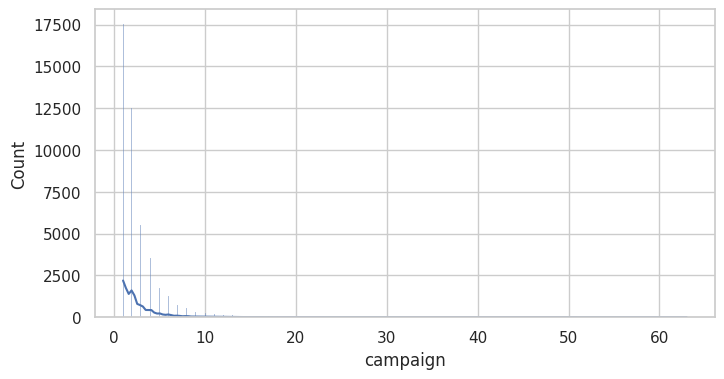

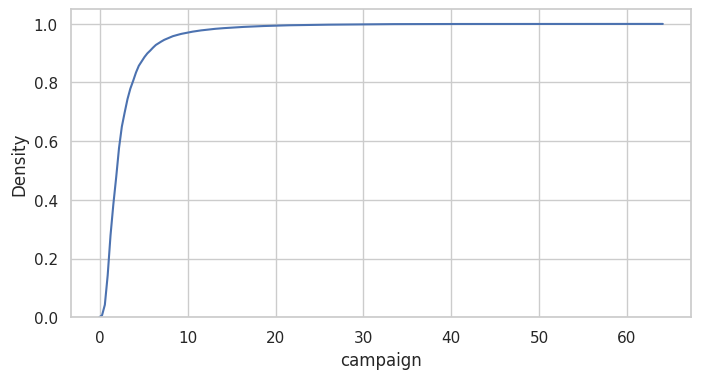

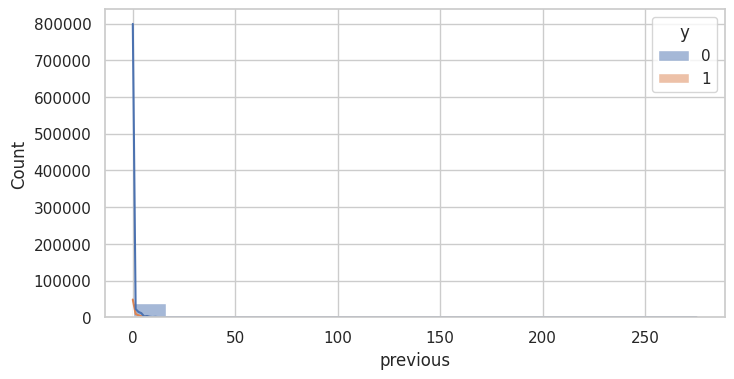

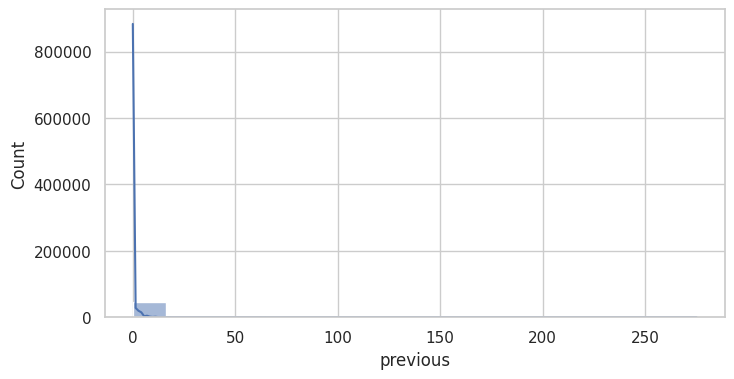

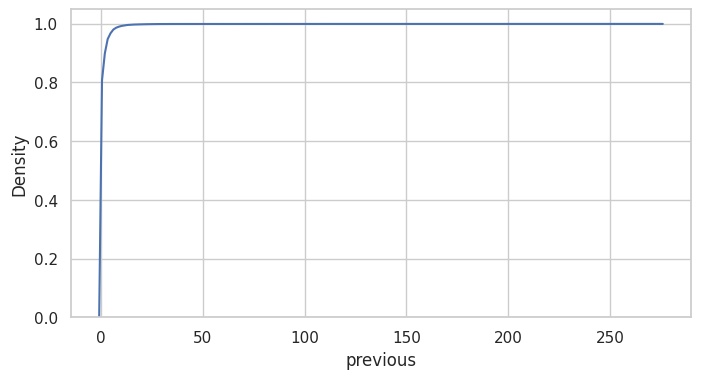

In [ ]:
for col in ['age', 'balance', 'duration', 'campaign', 'previous']:
    plot_histogram(train, col)

In [ ]:
!pip install scikit-learn
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

x = df_num[df_num.columns[:-1]]
y = df_num[df_num.columns[-1]]

x = MinMaxScaler().fit_transform(x)

In [ ]:
def save_encoder(encoder, destination):
    folder_name = "/".join(destination.split('/')[:-1])
    if not os.path.exists(folder_name):
        os.makedirs(folder_name)
    np.save(destination, encoder.classes_)

In [ ]:
# Label Encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
train['job'] = le.fit_transform(train['job'])
test['job'] = le.transform(test['job'])

In [ ]:
# One hot encoding
train = pd.get_dummies(train, columns=['marital', 'poutcome', 'contact'])
test = pd.get_dummies(test, columns=['marital', 'poutcome', 'contact'])

In [ ]:
# Ordinal Encoding
train['education'].replace(['primary', 'secondary', 'tertiary', 'unknown'], [1, 2, 3, 0], inplace=True)
test['education'].replace(['primary', 'secondary', 'tertiary', 'unknown'], [1, 2, 3, 0], inplace=True)

In [ ]:
# Standardize numerical data
from sklearn.preprocessing import StandardScaler # Import the StandardScaler class

scaler = StandardScaler()

cols = ['age', 'job', 'education', 'default', 'balance', 'housing', 'loan', 'duration', 'campaign', 'pdays', 'previous']

X_train = pd.DataFrame(scaler.fit_transform(train[cols]))
X_test = pd.DataFrame(scaler.transform(test[cols]))

Y_train = train['y']
Y_test = test['y']


X_train.columns = cols
X_test.columns = cols

In [ ]:
X_train = pd.concat([X_train, train.iloc[:, len(cols)+1:]], axis=1)
X_test = pd.concat([X_test, test.iloc[:, len(cols)+1:]], axis=1)

In [ ]:
train = pd.concat([X_train, Y_train], axis=1)

In [ ]:
test = pd.concat([X_test, Y_test], axis=1)

In [ ]:
train

,age,job,education,default,balance,housing,loan,duration,campaign,pdays,...,marital_married,marital_single,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,contact_cellular,contact_telephone,contact_unknown,y
0,1.606965,-0.103820,1.206484,-0.13549,0.256419,0.893915,-0.436803,0.011016,-0.569351,-0.411453,...,True,False,False,False,False,True,False,False,True,0
1,0.288529,1.424008,-0.077715,-0.13549,-0.437895,0.893915,-0.436803,-0.416127,-0.569351,-0.411453,...,False,True,False,False,False,True,False,False,True,0
2,-0.747384,-0.714951,-0.077715,-0.13549,-0.446762,0.893915,2.289359,-0.707361,-0.569351,-0.411453,...,True,False,False,False,False,True,False,False,True,0
3,0.571051,-1.020516,-2.646114,-0.13549,0.047205,0.893915,-0.436803,-0.645231,-0.569351,-0.411453,...,True,False,False,False,False,True,False,False,True,0
4,-0.747384,2.035139,-2.646114,-0.13549,-0.447091,-1.118674,-0.436803,-0.233620,-0.569351,-0.411453,...,False,True,False,False,False,True,False,False,True,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,0.947747,1.424008,1.206484,-0.13549,-0.176460,-1.118674,-0.436803,2.791329,0.076230,-0.411453,...,True,False,False,False,False,True,True,False,False,1
45207,2.831227,0.201746,-1.361914,-0.13549,0.120447,-1.118674,-0.436803,0.768224,-0.246560,-0.411453,...,False,False,False,False,False,True,True,False,False,1
45208,2.925401,0.201746,-0.077715,-0.13549,1.429593,-1.118674,-0.436803,3.373797,0.721811,1.436189,...,True,False,False,False,True,False,True,False,False,1
45209,1.512791,-1.020516,-0.077715,-0.13549,-0.228024,-1.118674,-0.436803,0.970146,0.399020,-0.411453,...,True,False,False,False,False,True,False,True,False,0


In [ ]:
X_train, Y_train = train.iloc[:, :-1], train.iloc[:, -1]
X_test, Y_test = test.iloc[:, :-1], test.iloc[:, -1]

# Model Selection

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [ ]:
models = []
models.append(LogisticRegression(solver='liblinear'))
models.append(SVC())
models.append(KNeighborsClassifier())
models.append(GaussianNB())
model_list = ['Logistic Regression', 'SVM', 'KNN',  'Naive Bayes']

In [ ]:
acc_list = []
auc_list = []
cm_list = []

In [ ]:
for model in models:
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)
    acc_list.append(metrics.accuracy_score(Y_test, Y_pred))
    fpr, tpr, _thresholds = metrics.roc_curve(Y_test, Y_pred)
    auc_list.append(round(metrics.auc(fpr, tpr),2))
    cm_list.append(confusion_matrix(Y_test, Y_pred))

# Evaluating

In [ ]:
# Accuracy and AUC
result_df = pd.DataFrame({'Model':model_list, 'Accuracy': acc_list, 'AUC': auc_list})
result_df

,Model,Accuracy,AUC
0,Logistic Regression,0.901349,0.64
1,SVM,0.907985,0.65
2,KNN,0.917054,0.71
3,Naive Bayes,0.833002,0.68


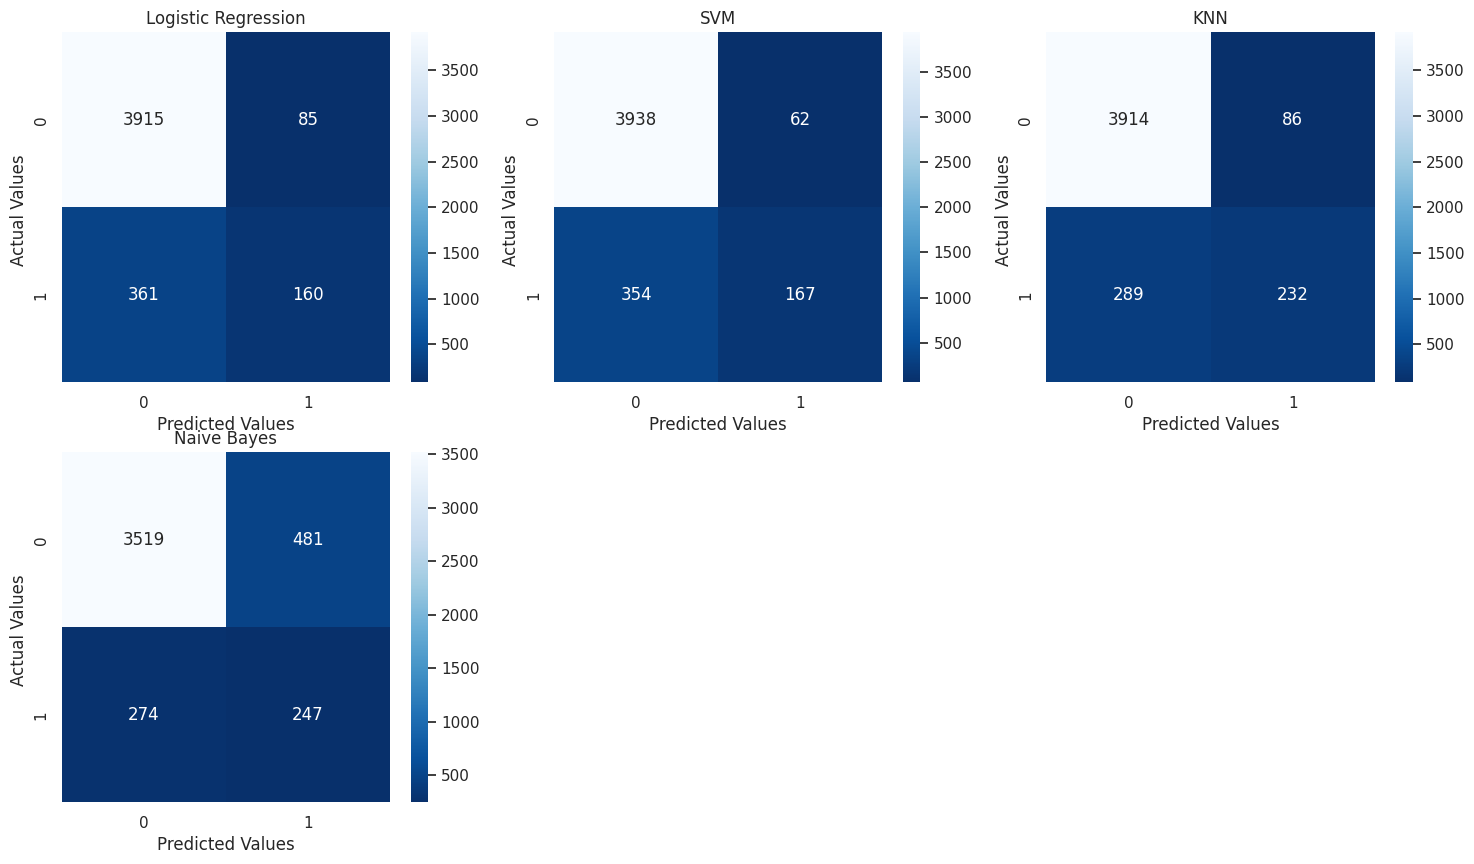

In [ ]:
# Plot confusion matrix
fig = plt.figure(figsize = (18,10))
for i in range(len(cm_list)):
    cm = cm_list[i]
    model = model_list[i]
    sub = fig.add_subplot(2, 3, i+1).set_title(model)
    cm_plot = sns.heatmap(cm, annot=True, fmt="d", cmap = 'Blues_r')
    cm_plot.set_xlabel('Predicted Values')
    cm_plot.set_ylabel('Actual Values ')

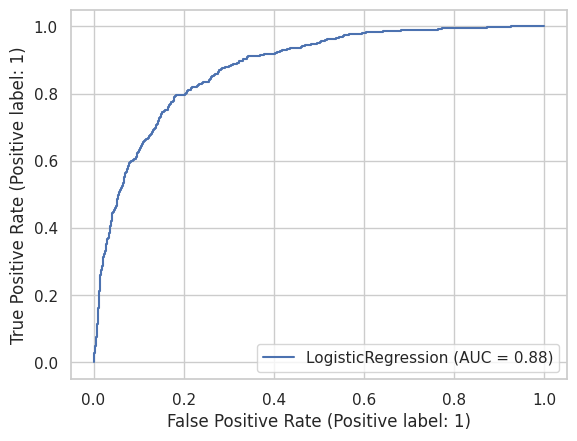

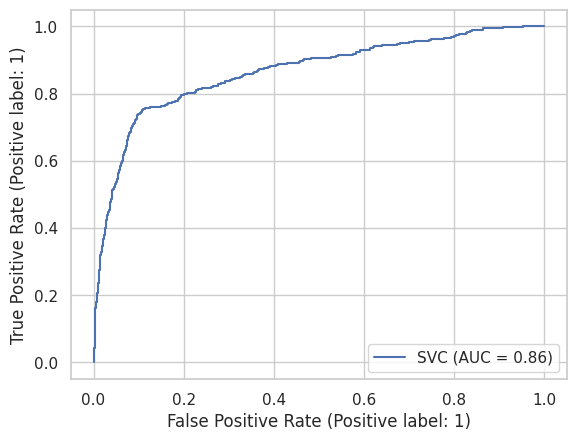

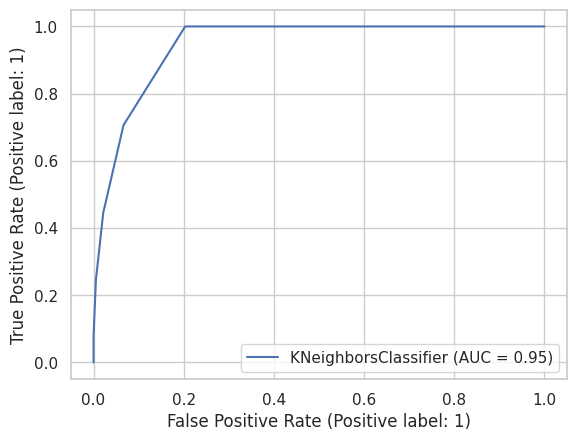

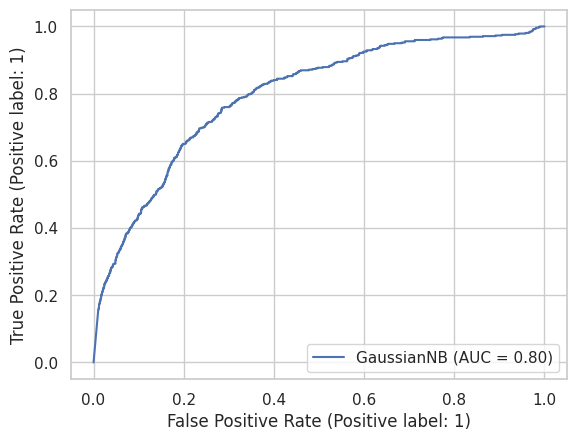

In [ ]:
# Plot ROC Curve
from sklearn.metrics import roc_curve, auc, RocCurveDisplay

for model in models:
    RocCurveDisplay.from_estimator(model, X_test, Y_test)